In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv('cleveland.csv', names=columns)

In [3]:
data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Chosen attributes for various data types:

- **Categorical/nominal: sex** (gender)
- **Ordinal: slope** (slope of peak exercise ST segment)
- **Continuous discreet: ca** (number of major vessels)
- **Continuous quantiative: tresbps** (resting blood pressure) 

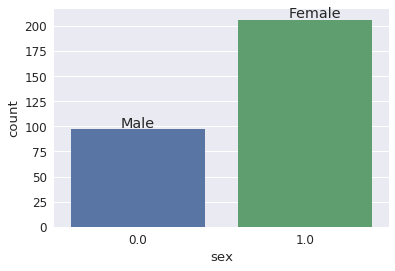

In [44]:
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
fig = sns.countplot(x="sex", data=data)
labels = ['Male', 'Female']
for i, p in enumerate(fig.patches):
        fig.annotate('{}'.format(labels[i]), (p.get_x()+0.3, p.get_height()+2))